#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32,3), activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [8]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

### categorical_crossentropy

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)  

Epoch 1/10
293/293 [==============================] - 38s 128ms/step - loss: 2.1583 - accuracy: 0.2078 - val_loss: 2.0472 - val_accuracy: 0.3105
Epoch 2/10
293/293 [==============================] - 43s 146ms/step - loss: 1.9514 - accuracy: 0.3031 - val_loss: 1.9463 - val_accuracy: 0.3425
Epoch 3/10
293/293 [==============================] - 38s 128ms/step - loss: 1.8380 - accuracy: 0.3487 - val_loss: 1.8392 - val_accuracy: 0.3954
Epoch 4/10
293/293 [==============================] - 37s 126ms/step - loss: 1.7411 - accuracy: 0.3834 - val_loss: 1.7589 - val_accuracy: 0.4238
Epoch 5/10
293/293 [==============================] - 37s 128ms/step - loss: 1.6699 - accuracy: 0.4067 - val_loss: 1.7163 - val_accuracy: 0.4208
Epoch 6/10
293/293 [==============================] - 37s 126ms/step - loss: 1.6009 - accuracy: 0.4297 - val_loss: 1.6268 - val_accuracy: 0.4550
Epoch 7/10
293/293 [==============================] - 38s 128ms/step - loss: 1.5475 - accuracy: 0.4439 - val_loss: 1.5783 - val_ac

### MSE

In [11]:
model_mse = model
model_mse.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

train_history_mse = model_mse.fit(x_img_train_normalize, y_label_train_OneHot,
                                  validation_split=0.25,
                                  epochs=10, batch_size=128, verbose=1)  

Epoch 1/10
293/293 [==============================] - 45s 151ms/step - loss: 0.0663 - accuracy: 0.4809 - val_loss: 0.0603 - val_accuracy: 0.5702
Epoch 2/10
293/293 [==============================] - 46s 156ms/step - loss: 0.0546 - accuracy: 0.5845 - val_loss: 0.0539 - val_accuracy: 0.6264
Epoch 3/10
293/293 [==============================] - 42s 145ms/step - loss: 0.0485 - accuracy: 0.6380 - val_loss: 0.0497 - val_accuracy: 0.6566
Epoch 4/10
293/293 [==============================] - 45s 154ms/step - loss: 0.0440 - accuracy: 0.6767 - val_loss: 0.0487 - val_accuracy: 0.6544
Epoch 5/10
293/293 [==============================] - 46s 156ms/step - loss: 0.0404 - accuracy: 0.7083 - val_loss: 0.0446 - val_accuracy: 0.6808
Epoch 6/10
293/293 [==============================] - 44s 150ms/step - loss: 0.0368 - accuracy: 0.7364 - val_loss: 0.0428 - val_accuracy: 0.6974
Epoch 7/10
293/293 [==============================] - 46s 156ms/step - loss: 0.0336 - accuracy: 0.7611 - val_loss: 0.0413 - val_ac

### binary _crossentropy

In [12]:
model_bi = model
model_bi.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_history_bi = model_bi.fit(x_img_train_normalize, y_label_train_OneHot,
                                validation_split=0.25,
                                epochs=10, batch_size=128, verbose=1) 

Epoch 1/10
293/293 [==============================] - 49s 164ms/step - loss: 0.1232 - accuracy: 0.8210 - val_loss: 0.1439 - val_accuracy: 0.7327
Epoch 2/10
293/293 [==============================] - 46s 156ms/step - loss: 0.0922 - accuracy: 0.8587 - val_loss: 0.1399 - val_accuracy: 0.7338
Epoch 3/10
293/293 [==============================] - 42s 144ms/step - loss: 0.0816 - accuracy: 0.8753 - val_loss: 0.1358 - val_accuracy: 0.7349
Epoch 4/10
293/293 [==============================] - 42s 145ms/step - loss: 0.0722 - accuracy: 0.8905 - val_loss: 0.1325 - val_accuracy: 0.7379
Epoch 5/10
293/293 [==============================] - 42s 144ms/step - loss: 0.0649 - accuracy: 0.9041 - val_loss: 0.1301 - val_accuracy: 0.7467
Epoch 6/10
293/293 [==============================] - 40s 137ms/step - loss: 0.0574 - accuracy: 0.9202 - val_loss: 0.1328 - val_accuracy: 0.7388
Epoch 7/10
293/293 [==============================] - 40s 135ms/step - loss: 0.0523 - accuracy: 0.9282 - val_loss: 0.1304 - val_ac

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

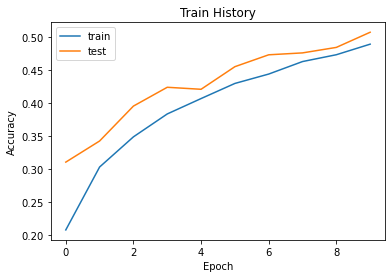

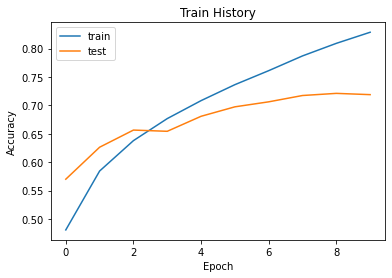

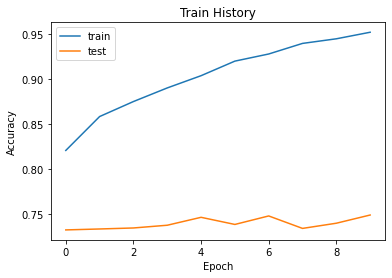

In [14]:
show_train_history(train_history,"accuracy","val_accuracy")
show_train_history(train_history_mse,"accuracy","val_accuracy")
show_train_history(train_history_bi,"accuracy","val_accuracy")

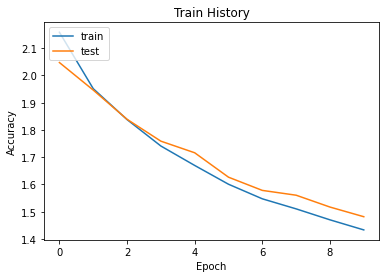

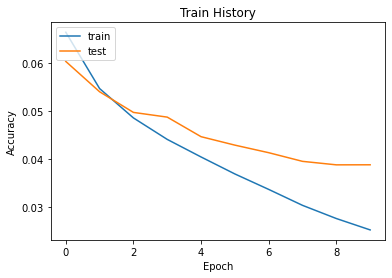

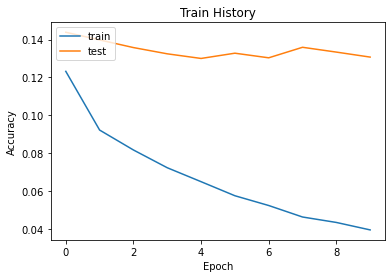

In [15]:
show_train_history(train_history,"loss","val_loss")
show_train_history(train_history_mse,"loss","val_loss")
show_train_history(train_history_bi,"loss","val_loss")